<a href="https://colab.research.google.com/github/SHIVRAJSHINDE/AShiv/blob/master/nlpEmotionClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install all required Liabraries
!pip install transformers
!pip install datasets
!pip install bertviz
!pip install umap-learn


INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 471.6/471.6 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.1/139.1 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.7/82.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.6 MB/s eta 0:00:00


In [ ]:
#import pandas
import pandas as pd


In [ ]:
# import datasets
from datasets import list_datasets


In [ ]:
# Print Datasets
listDataSets = list_datasets()
print(listDataSets)


<ipython-input-4-19b3105d27d0>:1: FutureWarning: list_datasets is deprecated and will be removed in the next major version of datasets. Use 'huggingface_hub.list_datasets' instead.
  listDataSets = list_datasets()
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


['amirveyseh/acronym_identification', 'ade-benchmark-corpus/ade_corpus_v2', 'UCLNLP/adversarial_qa', 'Yale-LILY/aeslc', 'nwu-ctext/afrikaans_ner_corpus', 'fancyzhx/ag_news', 'allenai/ai2_arc', 'google/air_dialogue', 'komari6/ajgt_twitter_ar', 'legacy-datasets/allegro_reviews', 'tblard/allocine', 'mutiyama/alt', 'fancyzhx/amazon_polarity', 'defunct-datasets/amazon_reviews_multi', 'defunct-datasets/amazon_us_reviews', 'sewon/ambig_qa', 'nala-cub/americas_nli', 'legacy-datasets/ami', 'gavinxing/amttl', 'facebook/anli', 'sealuzh/app_reviews', 'deepmind/aqua_rat', 'google-research-datasets/aquamuse', 'bigIR/ar_cov19', 'hadyelsahar/ar_res_reviews', 'iabufarha/ar_sarcasm', 'abuelkhair-corpus/arabic_billion_words', 'QCRI/arabic_pos_dialect', 'halabi2016/arabic_speech_corpus', 'hsseinmz/arcd', 'ramybaly/arsentd_lev', 'allenai/art', 'arxiv-community/arxiv_dataset', 'tuanphong/ascent_kb', 'achrafothman/aslg_pc12', 'AmazonScience/asnq', 'facebook/asset', 'nilc-nlp/assin', 'nilc-nlp/assin2', 'allen

In [ ]:

from datasets import load_dataset
emotion = load_dataset('emotion')
emotion



Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
emotion.set_format(type='pandas')


In [ ]:
emotion


DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 2000
    })
})

In [ ]:
df = emotion['train'][:]
df


text  label
0                                i didnt feel humiliated      0
1      i can go from feeling so hopeless to so damned...      0
2       im grabbing a minute to post i feel greedy wrong      3
3      i am ever feeling nostalgic about the fireplac...      2
4                                   i am feeling grouchy      3
...                                                  ...    ...
15995  i just had a very brief time in the beanbag an...      0
15996  i am now turning and i feel pathetic that i am...      0
15997                     i feel strong and good overall      1
15998  i feel like this was such a rude comment and i...      3
15999  i know a lot but i feel so stupid because i ca...      0

[16000 rows x 2 columns]

In [ ]:

classes = emotion['train'].features['label'].names
classes


['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

In [ ]:

df['label_name'] = df['label'].apply(lambda x: classes[x])
df.head()


text  label label_name
0                            i didnt feel humiliated      0    sadness
1  i can go from feeling so hopeless to so damned...      0    sadness
2   im grabbing a minute to post i feel greedy wrong      3      anger
3  i am ever feeling nostalgic about the fireplac...      2       love
4                               i am feeling grouchy      3      anger

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
labelCounts = df['label_name'].value_counts()
labelCounts


label_name
joy         5362
sadness     4666
anger       2159
fear        1937
love        1304
surprise     572
Name: count, dtype: int64

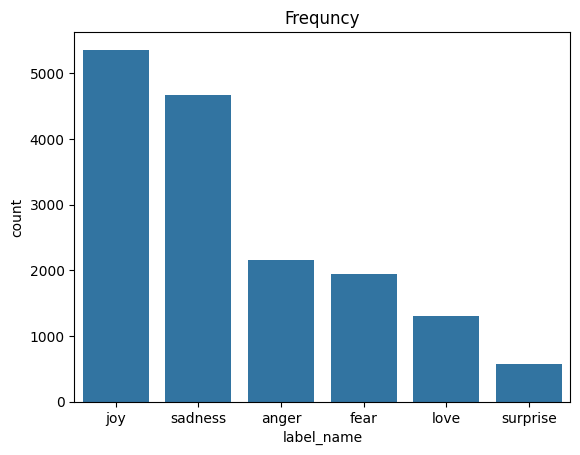

In [ ]:
sns.barplot(labelCounts)
plt.title("Frequncy")
plt.show()


In [ ]:
df['WordsPerTweet'] = df['text'].str.split().apply(len)
df


text  label label_name  \
0                                i didnt feel humiliated      0    sadness   
1      i can go from feeling so hopeless to so damned...      0    sadness   
2       im grabbing a minute to post i feel greedy wrong      3      anger   
3      i am ever feeling nostalgic about the fireplac...      2       love   
4                                   i am feeling grouchy      3      anger   
...                                                  ...    ...        ...   
15995  i just had a very brief time in the beanbag an...      0    sadness   
15996  i am now turning and i feel pathetic that i am...      0    sadness   
15997                     i feel strong and good overall      1        joy   
15998  i feel like this was such a rude comment and i...      3      anger   
15999  i know a lot but i feel so stupid because i ca...      0    sadness   

       WordsPerTweet  
0                  4  
1                 21  
2                 10  
3                 18  
4                  4  
...              ...  
15995             24  
15996             20  
15997              6  
15998             14  
15999             15  

[16000 rows x 4 columns]

<Axes: xlabel='label_name', ylabel='WordsPerTweet'>

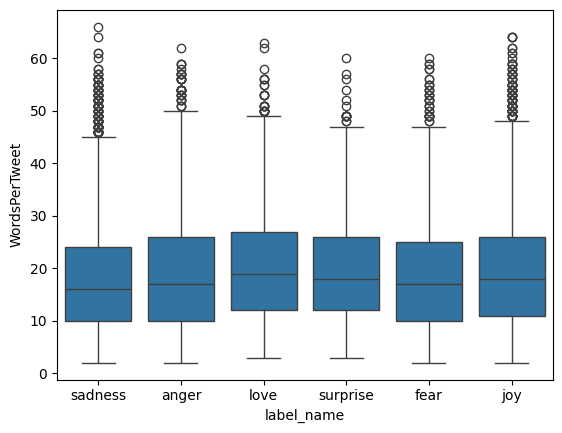

In [ ]:
sns.boxplot(x=df['label_name'],y=df['WordsPerTweet'])


In [ ]:

df['WordsPerTweet'].max()
df['WordsPerTweet'].min()


2

In [ ]:
from transformers import AutoTokenizer
model_ckpt = "distilbert-base-uncased"
model_ckpt


'distilbert-base-uncased'

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
text = "I love Machine nearning!. Tokenization is awasome"
enocded_text = tokenizer(text)
enocded_text


{'input_ids': [101, 1045, 2293, 3698, 2379, 5582, 999, 1012, 19204, 3989, 2003, 22091, 3022, 8462, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(enocded_text.input_ids)
tokens


['[CLS]',
 'i',
 'love',
 'machine',
 'near',
 '##ning',
 '!',
 '.',
 'token',
 '##ization',
 'is',
 'aw',
 '##as',
 '##ome',
 '[SEP]']

In [ ]:
emotion.reset_format()


In [ ]:
import pandas as pd

def tokenize(batch):
  temp = tokenizer(batch['text'],padding=True,truncation=True)
  return temp

tokenize(emotion['train'][1])


{'input_ids': [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
emotions_encoded = emotion.map(tokenize,batched=True,batch_size=None)
emotions_encoded


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 16000
    })
    validation: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 2000
    })
})

In [ ]:
{'input_ids': [[101, 1045, 2134, 2102, 2514, 26608, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [101, 1045, 2064, 2175, 2013, 3110, 2061, 20625, 2000, 2061, 9636, 17772, 2074, 2013, 2108, 2105, 2619, 2040, 14977, 1998, 2003, 8300, 102]],
 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

{'input_ids': [[101,
   1045,
   2134,
   2102,
   2514,
   26608,
   102,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [101,
   1045,
   2064,
   2175,
   2013,
   3110,
   2061,
   20625,
   2000,
   2061,
   9636,
   17772,
   2074,
   2013,
   2108,
   2105,
   2619,
   2040,
   14977,
   1998,
   2003,
   8300,
   102]],
 'attention_mask': [[1,
   1,
   1,
   1,
   1,
   1,
   1,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0,
   0],
  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
inputs = tokenizer(text,return_tensors='pt')
inputs


{'input_ids': tensor([[  101,  1045,  2293,  3698,  2379,  5582,   999,  1012, 19204,  3989,
          2003, 22091,  3022,  8462,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
from transformers  import AutoModel
import torch
model = AutoModel.from_pretrained(model_ckpt)



model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
model


DistilBertModel(
  (embeddings): Embeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (transformer): Transformer(
    (layer): ModuleList(
      (0-5): 6 x TransformerBlock(
        (attention): MultiHeadSelfAttention(
          (dropout): Dropout(p=0.1, inplace=False)
          (q_lin): Linear(in_features=768, out_features=768, bias=True)
          (k_lin): Linear(in_features=768, out_features=768, bias=True)
          (v_lin): Linear(in_features=768, out_features=768, bias=True)
          (out_lin): Linear(in_features=768, out_features=768, bias=True)
        )
        (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
        (ffn): FFN(
          (dropout): Dropout(p=0.1, inplace=False)
          (lin1): Linear(in_features=768, out_features=3072, bias=True)
          (lin2): Li

In [ ]:
with torch.no_grad():
  outputs = model(**inputs)

  last_hidden_states = outputs.last_hidden_state

  last_hidden_states


In [ ]:
outputs

BaseModelOutput(last_hidden_state=tensor([[[-0.2319, -0.0628, -0.0719,  ..., -0.1829,  0.2245,  0.5124],
         [ 0.1400,  0.2312,  0.2217,  ..., -0.1355,  0.2794,  0.4796],
         [ 0.5772,  0.5741,  0.8029,  ..., -0.1524,  0.2180,  0.2277],
         ...,
         [-0.4036,  0.5421,  0.3393,  ..., -0.1930, -0.1077, -0.2699],
         [-0.2231,  0.0627,  0.1430,  ..., -0.0260, -0.0463,  0.1619],
         [ 0.8749,  0.4250, -0.3485,  ...,  0.0347, -0.6279, -0.1975]]]), hidden_states=None, attentions=None)

In [ ]:
last_hidden_states.shape

torch.Size([1, 15, 768])

In [ ]:
from transformers  import AutoModelForSequenceClassification

num_labels = len(classes)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained(model_ckpt,num_labels=num_labels).to(device)
model


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): MultiHeadSelfAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)
 

In [ ]:
device

device(type='cuda')

In [ ]:
from transformers import TrainingArguments
batch_size = 64
model_name = "distilbert-finetuned-emotions"
training_args = TrainingArguments(output_dir = model_name,
                                  num_train_epochs=2,
                                  learning_rate=2e-5,
                                  per_device_train_batch_size=batch_size,
                                  per_device_eval_batch_size=batch_size,
                                  weight_decay=0.01,
                                  evaluation_strategy='epoch',
                                  disable_tqdm=False)



/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:

from sklearn.metrics import f1_score, accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)  # Change 'prediction' to 'predictions'
    f1 = f1_score(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {"f1": f1, "accuracy": acc}


In [ ]:
from transformers import Trainer

trainer = Trainer(model=model,args=training_args,
                  compute_metrics=compute_metrics,
                  train_dataset=emotions_encoded['train'],
                  eval_dataset=emotions_encoded['validation'],
                  tokenizer=tokenizer)

trainer


In [ ]:
trainer.train()


TrainOutput(global_step=500, training_loss=0.12074079895019531, metrics={'train_runtime': 241.6153, 'train_samples_per_second': 132.442, 'train_steps_per_second': 2.069, 'total_flos': 720342861696000.0, 'train_loss': 0.12074079895019531, 'epoch': 2.0})

In [ ]:
pred_outputs = trainer.predict(emotions_encoded['test'])
pred_outputs.metrics

{'test_loss': 0.1615985780954361,
 'test_f1': 0.9270837082497125,
 'test_accuracy': 0.9275,
 'test_runtime': 3.7006,
 'test_samples_per_second': 540.447,
 'test_steps_per_second': 8.647}

In [ ]:
import numpy as np
y_preds = np.argmax(pred_outputs.predictions,axis=1)
y_true = emotions_encoded['test'][:]['label']


In [ ]:
from sklearn.metrics import classification_report
print(classes)
print(classification_report(y_true,y_preds))


['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
              precision    recall  f1-score   support

           0       0.96      0.97      0.96       581
           1       0.95      0.94      0.94       695
           2       0.79      0.86      0.83       159
           3       0.92      0.93      0.93       275
           4       0.89      0.92      0.91       224
           5       0.86      0.64      0.73        66

    accuracy                           0.93      2000
   macro avg       0.90      0.88      0.88      2000
weighted avg       0.93      0.93      0.93      2000



In [ ]:
text = 'i want to kill you'
input_encoded = tokenizer(text, return_tensors='pt').to(device)
with torch.no_grad():
  outputs = model(**input_encoded)

logits = outputs.logits
pred = torch.argmax(logits, dim=1).item()
pred, classes[pred]


(3, 'anger')